# Data Preparation

This notebok is the second of 5 notebooks in total.

**Notebook 2 of 5**

### `EDA`, **`Data Preparation`**, `Clustering`, `Regression`, `Classification`

#### Students in Group 15:

Jake Brady - 19238428

Anirudh Verma - 23120231

Sakina Padghawala - 23011823

Soumadip Patra - 23168471

Tanmay Srivastava - 23118067

**All Students in the group contributed equally**

#### **Layout of Notebook:**
- 0. Import required libraries & Load Dataset
     - **Add Required Feature for classification**
- 1. Encode Categorical Attributes
- 2. Handle missing values
- 3. Feature Transformation
     - 3.1 Normalise Features
     - 3.2 Apply Scaling
- 4. Feature Selection
- 5. Save Dataset

## 0. Import Required Libraries & Load Dataset

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter("ignore")

In [24]:
df = pd.read_csv("steel_industry_data_pre_prep.csv")

In [25]:
df.isna().sum()

Unnamed: 0                              0
Usage_kWh                               0
Lagging_Current_Reactive_Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2                                     0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Datetime                                0
dtype: int64

**Conclusion**

There are no missing values

In [26]:
df.duplicated().sum()

0

**Conclusion**

There are no duplicates

Making a copy of the orignal dataset before we make changes.

In [27]:
df_original = df.copy()

### -- Add requested Feature

The project brief requires the creation of a new feature. This would be considered feature engineering and should be placed later in the notebook, however we did not want the transformation of the columns to effect the values of this column. As a result, we will add this column before any transformations take place.

A Feature `Usage_kWh_categorical` is to be created for classification purposes. The mean will be used to distinguish between Low and High usage. A median is another option here however it may result in two values which are the same being categorised as different usages.. hence we will use the mean.

In [28]:
# creating a new column Usage_kWh_categorical based on the mean of Usage_kWh column
df['Usage_kWh_categorical'] = np.where(df['Usage_kWh'] > df['Usage_kWh'].mean(), 'High', 'Low')
df['Usage_kWh_categorical'].value_counts()
mapper = {'High':1, 
          'Low': 0}
df['Usage_kWh_categorical'] = df['Usage_kWh_categorical'].replace(mapper)

The `Usage_kWh_categorical` is represented with High or Low, which is an ordinal feature. Hence we will encode it by mapping low to 0 and high to 1.

In [29]:
mapper = {'High':1, 
          'Low': 0}
df['Usage_kWh_categorical'] = df['Usage_kWh_categorical'].replace(mapper)

## 1. Encode Categorical Attributes

### One-Hot Encode Nominal Attributes

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            2190 non-null   int64  
 1   Usage_kWh                             2190 non-null   float64
 2   Lagging_Current_Reactive_Power_kVarh  2190 non-null   float64
 3   Leading_Current_Reactive_Power_kVarh  2190 non-null   float64
 4   CO2                                   2190 non-null   float64
 5   Lagging_Current_Power_Factor          2190 non-null   float64
 6   Leading_Current_Power_Factor          2190 non-null   float64
 7   NSM                                   2190 non-null   int64  
 8   WeekStatus                            2190 non-null   object 
 9   Day_of_week                           2190 non-null   object 
 10  Datetime                              2190 non-null   object 
 11  Usage_kWh_categor

`Datetime` is being treated as an object, let's convert it to a timestamp

In [31]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
print(type(df['Datetime'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [32]:
df = pd.get_dummies(df, drop_first=False)
df.head()

,Unnamed: 0,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Datetime,Usage_kWh_categorical,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,0,3.78,4.72,0.00,0.0,62.51,100.00,9000,2018-01-01 02:30:00,0,True,False,False,True,False,False,False,False,False
1,1,3.28,3.82,0.00,0.0,65.14,100.00,15300,2018-01-01 04:15:00,0,True,False,False,True,False,False,False,False,False
2,2,3.28,3.49,0.00,0.0,68.48,100.00,20700,2018-01-01 05:45:00,0,True,False,False,True,False,False,False,False,False
3,3,3.64,0.00,16.88,0.0,100.00,21.08,36000,2018-01-01 10:00:00,0,True,False,False,True,False,False,False,False,False
4,4,3.71,0.00,18.00,0.0,100.00,20.19,37800,2018-01-01 10:30:00,0,True,False,False,True,False,False,False,False,False


In [33]:
df = df.rename(columns={'WeekStatus_Weekend': 'isWeekend',
                        'Day_of_week_Monday': 'Monday',
                        'Day_of_week_Tuesday': 'Tuesday',
                        'Day_of_week_Wednesday': 'Wednesday',
                        'Day_of_week_Thursday': 'Thursday',
                        'Day_of_week_Friday': 'Friday',
                        'Day_of_week_Saturday': 'Saturday',})
df = df.drop(columns=['Day_of_week_Sunday', 'WeekStatus_Weekday', 'Unnamed: 0'])


## 2. Handle Missing values

There are no missing values present in the dataset

## 3. Feature Transformation

A decision to normalise features before applying scaling is made.

There are some features with extremely wide ranges. Once they are scaled down to the RobustScaler range, the power of log or cubic normalisation is lost. Hence, we do it first.

Let's first revisit the distributions found in the previous notebook.

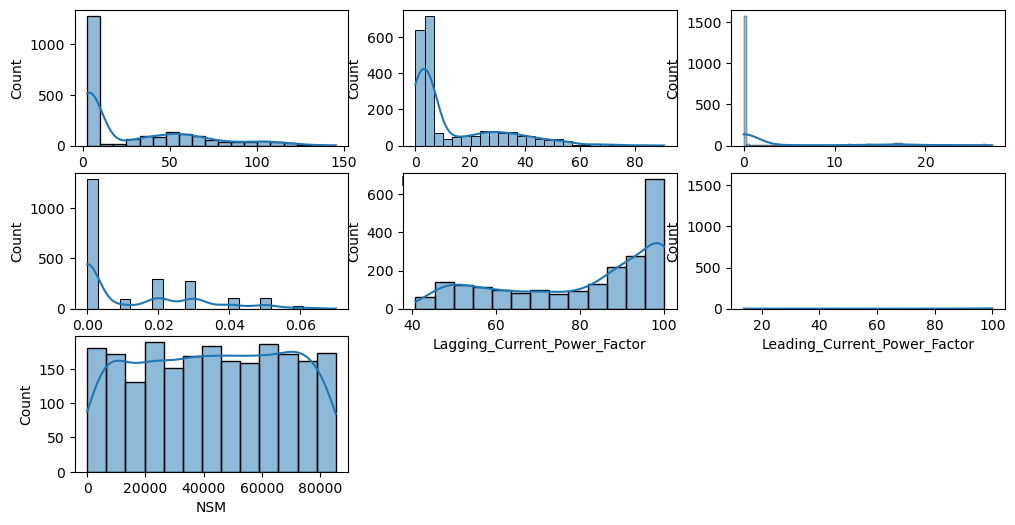

In [34]:
def showDistributions():
    orginal_numerics = ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
           'Leading_Current_Reactive_Power_kVarh', 'CO2',
           'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']
    
    plt.figure(figsize=(12,6))
    for i, col in enumerate(df[orginal_numerics].columns):
        plt.subplot(3,3,i+1)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col)
        plt.ylabel('Count')

showDistributions()

### 3.1 Normalise Features

In [35]:
RequiredNormalisation = df.select_dtypes(include=['number']).columns
RequiredNormalisation

Index(['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Usage_kWh_categorical'],
      dtype='object')

`NSM` is equally distributed and does not required normalisation, hence it is omitted.

`Usage_kWh_categorical` is a binary feature to be used for classification and should remain untouched.

In [36]:
RequiredNormalisation = RequiredNormalisation.drop(['NSM', 'Usage_kWh_categorical'])
RequiredNormalisation

Index(['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor'],
      dtype='object')

In [37]:
for col in RequiredNormalisation:
    df[col] = np.cbrt(df[col]) 

Let's look at the distributions now

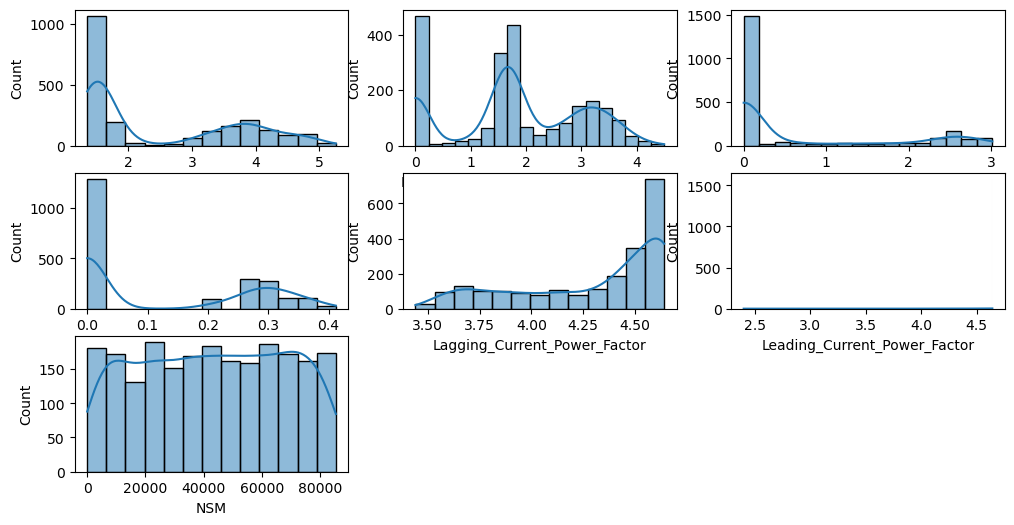

In [38]:
showDistributions()

### 3.2 Apply Scaling

We will handle all of the orginally numerical features using a robust scalar. Although some features don't contain outliers, there are some large spreads of data and should benefit from the RobustScaler.

`Usage_kWh_categorical` is a binary feature to be used for classification and should remain untouched.

In [39]:
Requires_RobustScaling = df.select_dtypes(include=['number']).columns
Requires_RobustScaling = Requires_RobustScaling.drop(['Usage_kWh_categorical'])
print(Requires_RobustScaling)

Index(['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'],
      dtype='object')


In [40]:
robust_scaler = RobustScaler()
df[Requires_RobustScaling] = robust_scaler.fit_transform(df[Requires_RobustScaling])

In [41]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Datetime,Usage_kWh_categorical
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190,2190.000000
mean,0.374880,0.060658,0.509052,0.458881,-0.249905,-100.564471,-0.004043,2018-07-04 13:22:34.109588992,0.393607
min,-0.138389,-1.074812,0.000000,0.000000,-1.620621,-603.404485,-1.000000,2018-01-01 02:30:00,0.000000
25%,-0.082851,-0.254582,0.000000,0.000000,-0.720314,-1.000000,-0.500000,2018-04-06 17:11:15,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018-07-06 06:07:30,0.000000
75%,0.917149,0.745418,1.000000,1.000000,0.279686,0.000000,0.500000,2018-10-03 02:56:15,1.000000
max,1.580246,1.741579,2.316849,1.518294,0.302350,0.000000,0.979167,2018-12-31 22:45:00,1.000000
std,0.540288,0.754812,0.819185,0.556309,0.575338,196.752845,0.574542,NaN,0.488661


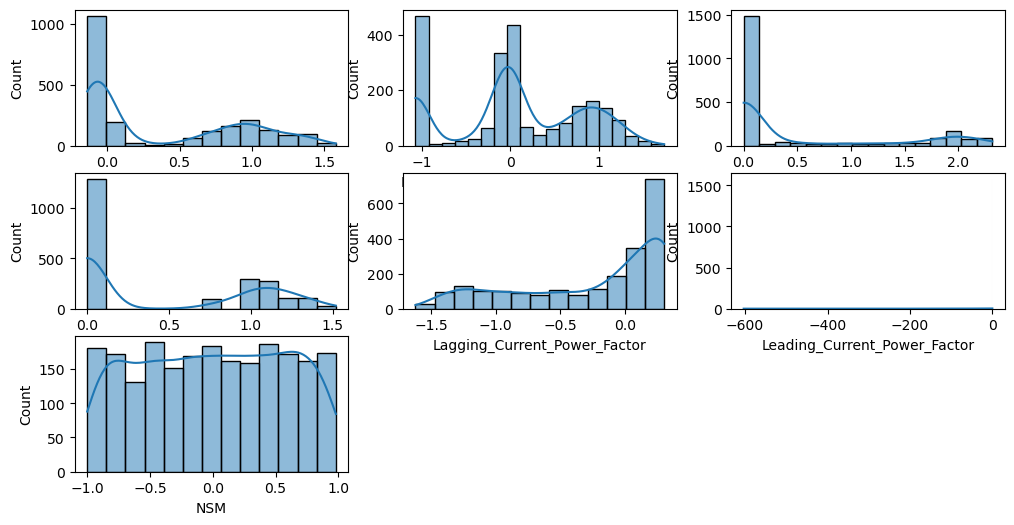

In [42]:
showDistributions()

## 4. Feature Selection

We can drop the `date` column as it provides no value to any of our models

In [43]:
df = df.drop(columns='Datetime')

All other features seem to hold value. There may be scope to drop one of the leading or lagging Power features to reduce noise however this will be omitted for now and can be addressed at the model training stage.

It can be recommended in model training pipelines to include CV parameters that will test out dropping one of these features v.s retaining the feature. The feature containing the most noise and least value to a model would be the `Leading_Current_Power_Factor`, due to its huge number of outliers and variance.

## 5. Save the dataset

In [44]:
df.to_csv("prepped_data.csv")